In [1]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
value = IntSlider()

# print(value.get_interact_value())
value

In [3]:
from IPython.display import display
w = IntSlider()
display(w)

In [19]:
def f(x): return (10 * x**3 + 12 * x**2 + 15 * x**1)

# define derivative
def g(x): return (10* 3 * x**2 + 12 * 2 * x**1 + 15 * x**0 )


def h(x,y):
    if x==y: 
        return g(x)
    else:
        return ((f(x)-f(y))/(x-y))

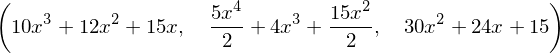

In [20]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)
x = Symbol('x')
Int_f = integrate(f(x))
Diff_f = diff(f(x))
(f(x),Int_f,Diff_f)

In [21]:
x_min = -2
x_max = - x_min
x = np.linspace(x_min, x_max, num=100)

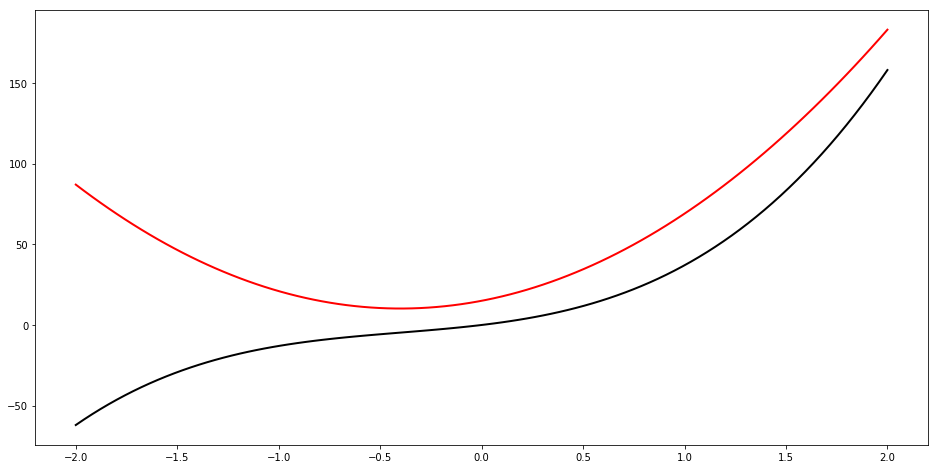

In [22]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, f(x),'-', color= 'black', linewidth = 2)
ax.plot(x, g(x),'-', color= 'red', linewidth = 2)
ymin, ymax = ax.get_ylim()
# print(ymin, ymax)

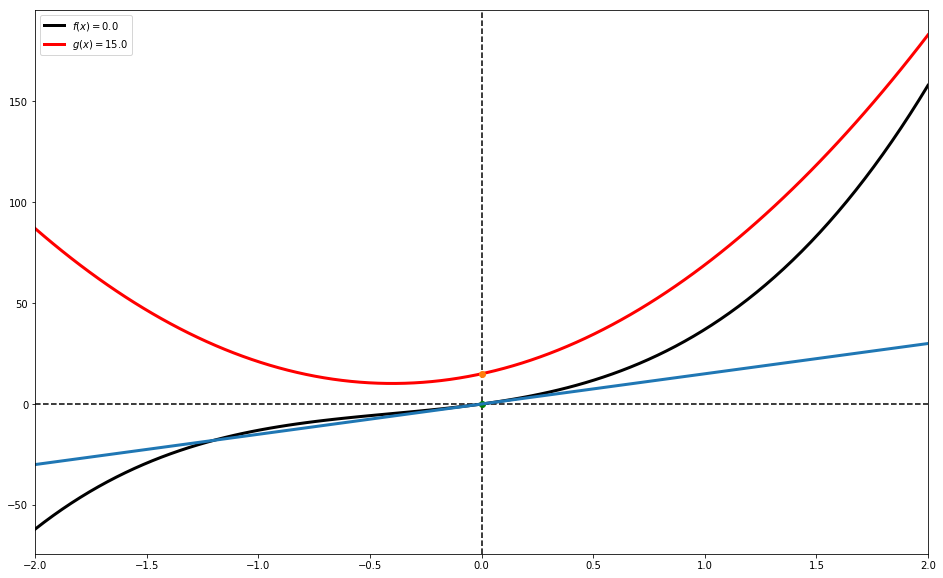

In [23]:
def update(w = 0):
    fig = plt.figure(figsize=(16,10))
    ax = fig.add_subplot(1, 1, 1)
    plt.xlim(x_min,x_max)
    
    plt.ylim(ymin,ymax)
    plt.vlines(0,ymin,ymax,linestyle='--')
    plt.hlines(0,x_min,x_max,linestyle='--')
    value_f = r'$f(x)=$' + str(f(w))
    ax.plot(x, f(x),'-', color= 'black', label=value_f,linewidth=3)
    
    ax.plot(w,f(w),'o',color='green',linewidth=3)
    ax.plot(x, g(w)* x + f(w)-g(w)*w ,linewidth=3)
    value_g = r'$g(x)=$' + str(g(w))
    ax.plot(x,g(x),color="red", label=value_g,linewidth=3)
    ax.plot(w,g(w),'o')
    plt.legend()
    
    
    
    
#     ax.plot(x, g
    fig.canvas.draw()
    plt.show()
interact(update, w=(x_min,x_max,0.1) , a = True );

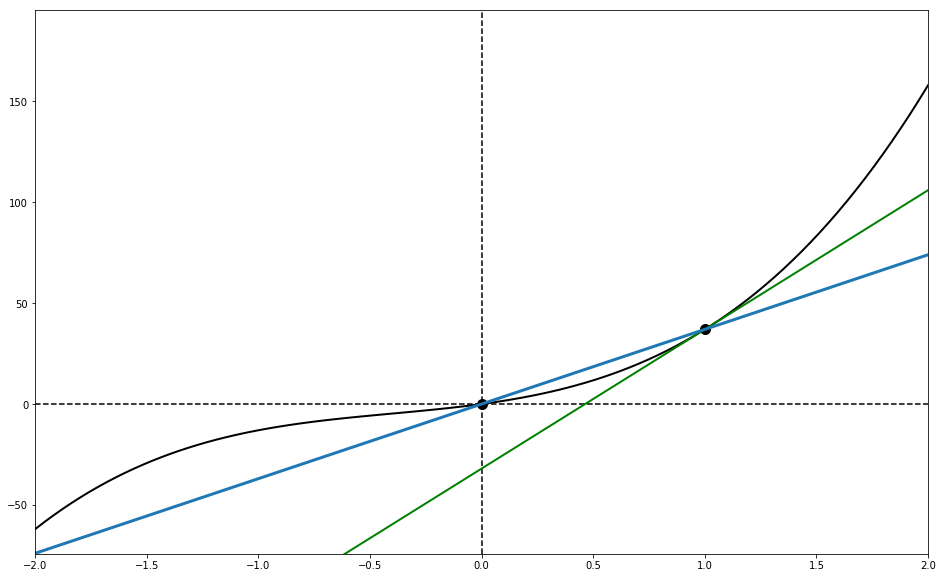

In [9]:
def update(w = 1, z=0, a = True, b = False):
    

    
    fig = plt.figure(figsize=(16,10))
    ax = fig.add_subplot(1, 1, 1)
    plt.xlim(x_min,x_max)
    
    plt.ylim(ymin,ymax)
    plt.vlines(0,ymin,ymax,linestyle='--')
    plt.hlines(0,x_min,x_max,linestyle='--')
    

    
    if a == True: ax.plot(x, f(x),'-', color= 'black', label=r'$f(x)=$' + str(f(w)), linewidth=2)
        
        
    ax.plot(w,f(w),'o',color='black', markersize=10)
#     ax.plot(x, g(w)* x + f(w)-g(w)*w )

    ax.plot(x,  f(w) + g(w)*(x-w), color='green', linewidth = 2)

    if b == True: 
        ax.plot(x,g(x),color="red", label= r'$g(x)=$' + str(g(w)),linewidth=2)
        ax.plot(w,g(w),'o', color='Red', markersize=10)
    ax.plot(z,f(z),'o', color='Black',markersize=10)
    
    ax.plot(x, f(w) + h(w,z)*(x-w),linewidth=3)
    
    
    
    
    
#     ax.plot(x, g
    fig.canvas.draw()
    plt.show()
#     plt.legend()

    
interact(update, w=(x_min,x_max,0.1), z=(x_min,x_max,0.1),
         a = widgets.Checkbox(value=True ,description=r'Plot $f(x)$?'),
         b = widgets.Checkbox(value=False ,description='Plot $f\'(x)$ ? '), height=10);
# a = widgets.HBox(description = "Test")
# display(a)

# Integration

In [10]:
def k(x): return x**2 + 10 

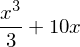

In [11]:
init_printing(use_unicode=False, wrap_line=False, no_global=True)
x = Symbol('x')
integrate(k(x))

In [12]:
x_min = 0 
x_max = 10
x_steps = 11
x = np.linspace(x_min, x_max, x_steps)

x_center =(x[0:x_steps-1]+x[1:x_steps])/2

Int_inf = sum(k(x[0:x_steps-1])*(x[1]-x[0]))
Int_sup = sum(k(x[1:x_steps])*(x[1]-x[0]))
Int_center = sum(k(x_center))*(x_center[1]-x_center[0])
Int_Val = mpmath.quad(k,(x_min,x_max))
print(Int_inf,Int_center,Int_sup,Int_Val)
print(Int_Val-Int_inf,Int_Val-Int_center,Int_Val-Int_sup)

385.0 432.5 485.0 433.333333333333
48.3333333333333 0.833333333333314 -51.6666666666667


In [13]:
x[0:x_steps-1]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

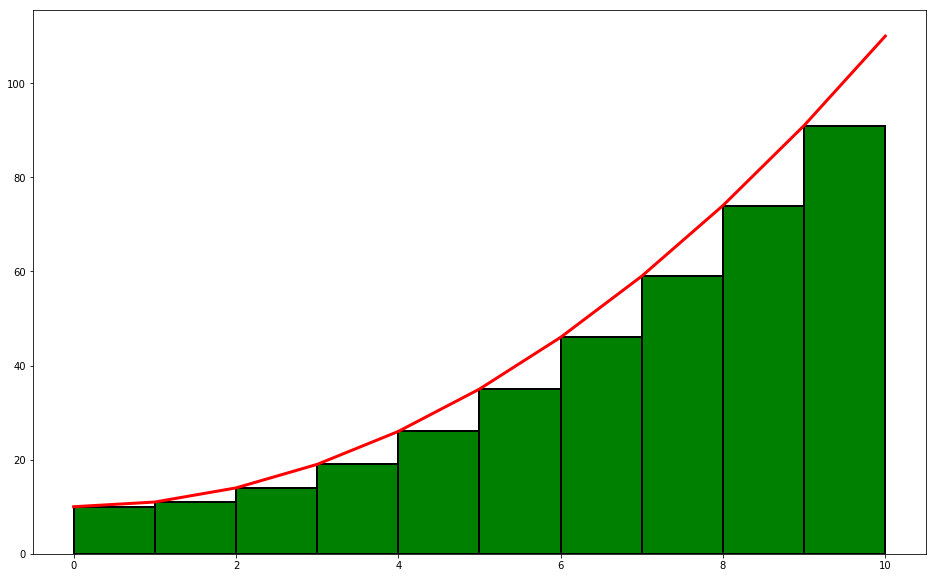

In [14]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,k(x),'r-', linewidth=3);
plt.bar(x[0:x_steps-1],k(x[0:x_steps-1]),width=(x[1]-x[0]),color='green',align='edge',edgecolor = "black", linewidth=2);
# ax.hlines(k(x[0:x_steps-1]),xmin=x_min,xmax=x_max)

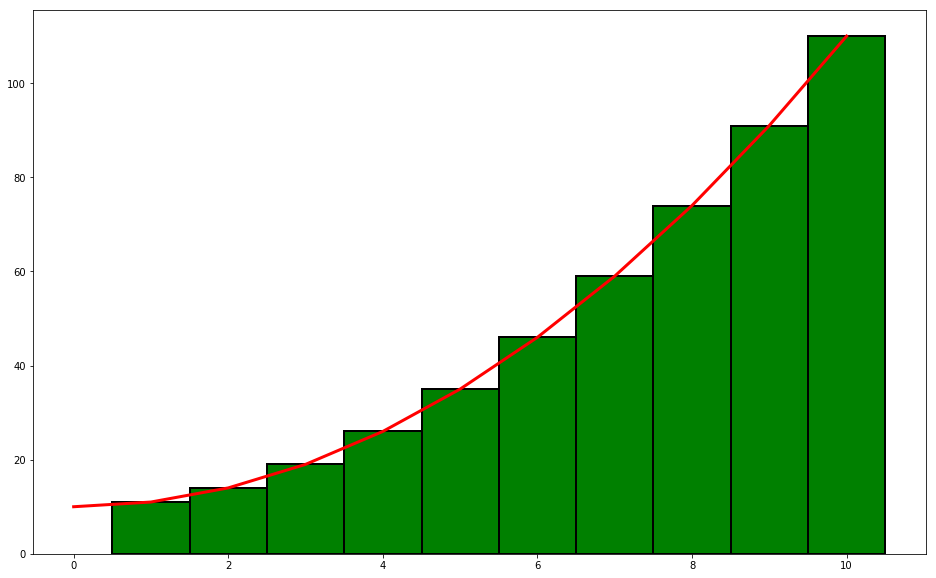

In [15]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,k(x),'r-', linewidth=3);
plt.bar(x[1:x_steps],k(x[1:x_steps]),width=(x[0]-x[1]),color='green',align='center',edgecolor = "black",linewidth=2);
# plt.hlines(k(x[1:11]),1,11)

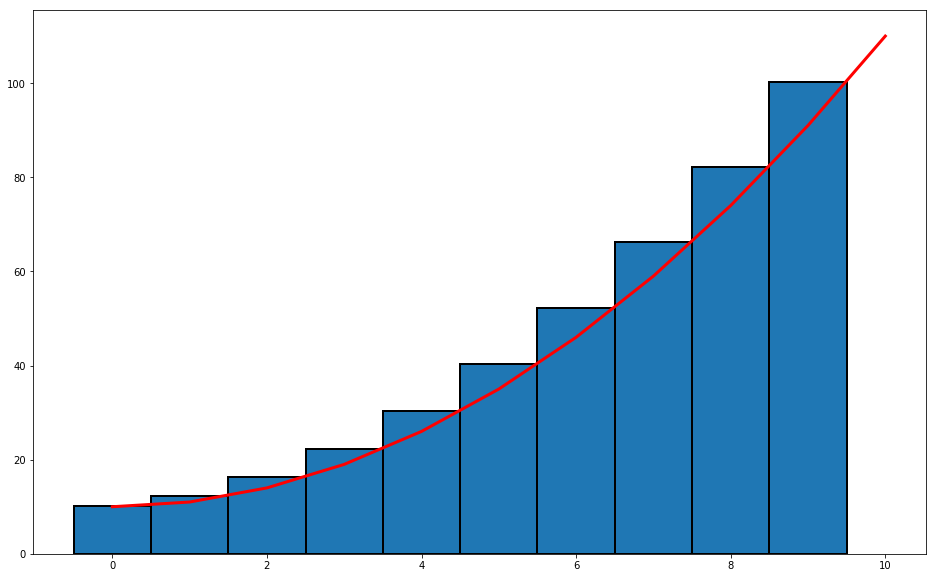

In [16]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,k(x),'r-', linewidth=3);
plt.bar(x[0:x_steps-1],k(x_center),width=(x_center[1]-x_center[0]),edgecolor = "black",linewidth=2);